In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('aggregate/agg_match_stats_0.csv')
deaths = pd.read_csv('deaths/kill_match_stats_final_0.csv')

In [3]:
matches.drop('date',inplace = True, axis = 1)
matches.dropna(inplace=True)
deaths.dropna(inplace = True)

In [4]:
matches = matches[['match_id','player_name', 'game_size',  'match_mode', 'party_size', 'player_assists',
       'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg',
       'player_kills',  'player_survive_time', 'team_id',
       'team_placement']]

In [5]:
matches[['game_size', 'party_size', 'player_assists',
       'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg',
       'player_kills', 'player_survive_time', 'team_id',
       'team_placement']].apply(pd.to_numeric,downcast='unsigned')

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
0,37,2,0,1,2870.724000,1784.847780,117,1,1106.320,4,18
1,37,2,0,1,2938.407230,1756.079710,127,1,1106.315,4,18
2,37,2,0,0,0.000000,224.157562,67,0,235.558,5,33
3,37,2,0,0,0.000000,92.935150,0,0,197.553,5,33
4,37,2,0,0,2619.077390,2510.447000,175,2,1537.495,14,11
5,37,2,0,0,2896.312500,2167.932130,65,0,1537.500,14,11
6,37,2,0,0,0.000000,3118.580320,0,0,1264.792,15,17
7,37,2,0,0,0.000000,3237.202000,0,0,1264.795,15,17
8,37,2,0,0,0.000000,1552.314700,79,0,868.560,17,24
9,37,2,0,1,0.000000,1450.314700,101,1,868.555,17,24


In [6]:
matches['game_size'].astype('int',)
matches['player_dmg'].astype('int32')
matches['player_kills'].astype('int32')
matches['team_placement'].astype('int16')
matches['player_dist_ride'].astype('float')
matches['player_dist_walk'].astype('float')
matches['player_survive_time'].astype('float')
matches['player_assists'].astype('int64')
matches['party_size'].astype('int16')

0           2
1           2
2           2
3           2
4           2
           ..
13849282    2
13849283    2
13849284    2
13849285    2
13849286    2
Name: party_size, Length: 13829038, dtype: int16

In [8]:
# matches.to_pickle('matches.pkl')

In [7]:
pd.to_numeric(deaths['killer_placement'], errors='coerce', downcast = 'integer')
pd.to_numeric(deaths['victim_placement'], errors='coerce',downcast = 'integer')
pd.to_numeric(deaths['time'], downcast = 'integer')
deaths['victim_placement'] = pd.to_numeric(deaths['victim_placement'],errors='coerce')
deaths['killer_placement'] = pd.to_numeric(deaths['killer_placement'],errors='coerce')

In [8]:
deaths['time'].astype('int64')
deaths['killer_placement'].astype('float')
deaths['killer_position_x'].astype('float')
deaths['killer_position_y'].astype('float')
deaths['victim_placement'].astype('float')
deaths['victim_position_x'].astype('float')
deaths['victim_position_y'].astype('float')
deaths['killer_placement'].astype('int32')
deaths['victim_placement'].astype('int32')

0            5
1           33
2           46
3           13
4           13
            ..
13426342    11
13426344    28
13426345    19
13426346    11
13426347    20
Name: victim_placement, Length: 12100406, dtype: int32

In [9]:
deaths = deaths[['match_id','time','killed_by','killer_name','killer_placement','killer_position_x','killer_position_y',
                'map','victim_name','victim_placement','victim_position_x','victim_position_y']]

In [12]:
# deaths.to_pickle('deaths.pkl')

In [ ]:
# matches = pd.read_pickle('matches.pkl')
# deaths = pd.read_pickle('deaths.pkl')

In [ ]:
# deaths.shape

In [ ]:
# deaths.head()

In [ ]:
# matches.shape

In [10]:
matches_mid = matches['match_id'].unique()
matches_mid = set(matches_mid)

In [ ]:
# matches_mid

In [11]:
deaths_mid = deaths['match_id'].unique()
deaths_mid = set(deaths_mid)
# deaths_mid

In [12]:
overlap_id = matches_mid.intersection(deaths_mid)
overlap_id = list(overlap_id) 

In [13]:
matches_pn = matches['player_name'].unique()
deaths_pn = deaths['killer_name'].unique()
matches_pn = set(matches_pn)
deaths_pn = set(deaths_pn)
overlap_pn = matches_pn.intersection(deaths_pn)
overlap_pn = list(overlap_pn)

In [14]:
ol_matches = matches[matches['match_id'].isin(overlap_id)]
ol_matches = ol_matches[ol_matches['player_name'].isin(overlap_pn)]

ol_deaths = deaths[deaths['match_id'].isin(overlap_id)]
ol_deaths = ol_deaths[ol_deaths['killer_name'].isin(overlap_pn)]

In [15]:
ol_matches[ol_matches['team_placement']==0].sort_values('player_name')

,match_id,player_name,game_size,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
5599658,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,DDD3D9,28,tpp,4,0,2,2796.281490,7367.714360,360,3,1670.269,18,0
5599705,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,DIAOZATIANTING,28,tpp,4,0,1,4590.824000,5754.140630,100,1,1668.077,25,0
5599707,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,Faifer,28,tpp,4,0,0,3385.963130,4304.805000,87,0,820.232,25,0
5599657,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,Fioraaa_,28,tpp,4,0,0,0.000000,252.545013,0,0,205.017,18,0
5599691,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,HP-chicken,28,tpp,4,0,1,0.000000,2233.470700,13,1,1329.287,9,0
5599656,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,Silver_Exige,28,tpp,4,1,4,740.907100,11610.501000,395,3,1710.484,18,0
5599706,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,TWY1990,28,tpp,4,0,1,2106.028320,7480.149410,254,2,1661.286,25,0
5599692,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,Victoryeven,28,tpp,4,0,1,0.000000,212.889587,54,0,182.554,9,0
5599655,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,fff0523,28,tpp,4,1,0,3614.500000,6459.207520,65,0,1707.921,18,0
5599689,2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0Z...,free-man2009,28,tpp,4,1,3,186.814728,2029.099120,306,3,1329.190,9,0


In [16]:
ol_deaths[ol_deaths['killer_name'] == 'DIAOZATIANTING']['match_id'].iloc[0]

'2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0ZDDzGQdrUZK4lUthaTE'

### That's strange...
For some reason, these players have a team_placement value of 0. I am not sure of how this error arises, but it will screw up my modeling in the long run. I'll elect to just toss out this match.

In [17]:
ol_matches = ol_matches[ol_matches['match_id'] != '2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0ZDDzGQdrUZK4lUthaTE']
ol_deaths = ol_deaths[ol_deaths['match_id'] != '2U4GBNA0YmkRsTe3P88Ue76_UUt_OdCmh2YQNtsAizht0ZDDzGQdrUZK4lUthaTE']


### I think I have formulated enough
Let's take a look at some actual things.
1. Which weapon is used to kill the most?
2. Which areas of the map does the most action occur at?
3. Around what time do most kills occur at?
4. What correlates to higher rankings?

In [26]:
ol_deaths['killed_by'].value_counts().sort_values(ascending=False)[1:6]

M416      1484147
SCAR-L    1209743
M16A4     1200093
AKM       1106525
UMP9       716060
Name: killed_by, dtype: int64

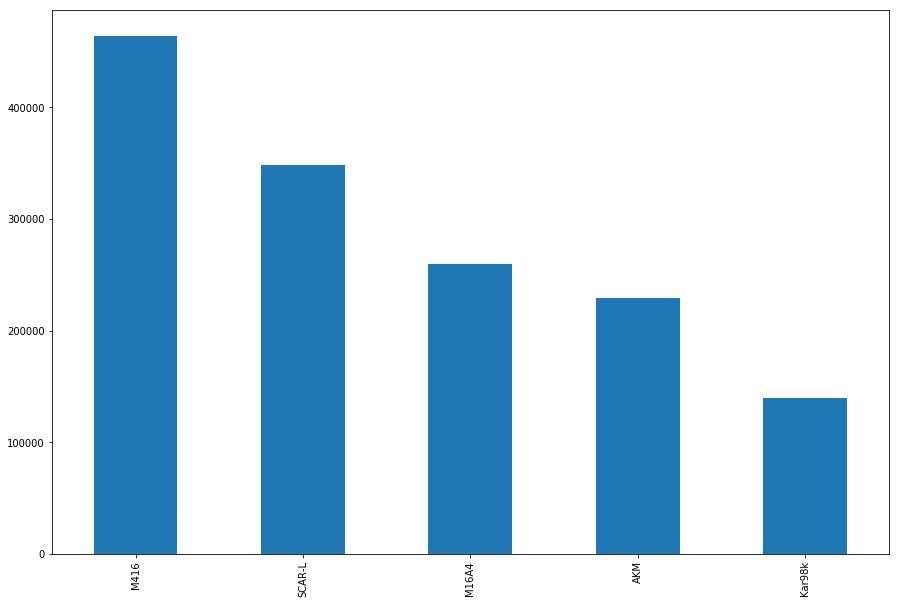

In [75]:
top3 = ol_deaths[ol_deaths['killer_placement']<=3]
top3['killed_by'].value_counts().sort_values(ascending=False)[1:6].plot.bar(figsize=(15,10))

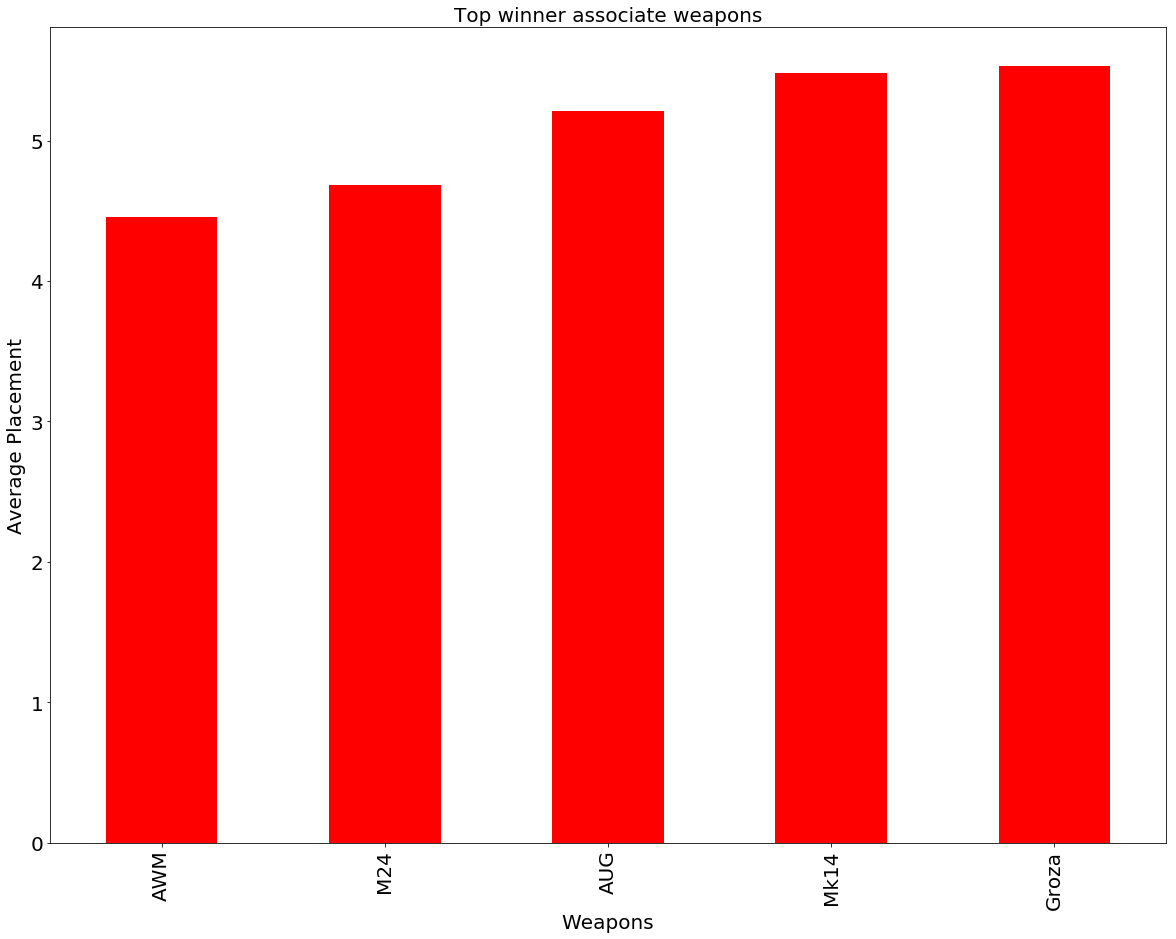

In [62]:
plt.figure()
ol_deaths.groupby('killed_by')['killer_placement'].mean().sort_values(ascending=True)[:5].plot(title='Top winner associates',
                                                                                               kind='bar',fontsize=20,
                                                                                               figsize=(20,15),color='Red')
plt.xlabel('Weapons',fontsize=20)
plt.ylabel('Average Placement',fontsize=20)
plt.tick_params(labelsize=20)
plt.title('Top winner associate weapons', fontsize=20)
plt.show()

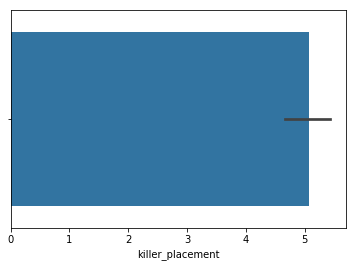

### Down and Out?

I don't play that much PUBG. I had to look this up. Down and Out actually refers to a state in the game where the player is knocked out, then dies. Unfortunately, this doesn't give us information about weapons being used at all. The next entry is an actual weapon. Besides being knocked out (which could be by way of M416,) the M416 in general finishes off players the most.

In [ ]:
# from scipy.ndimage.filters import gaussian_filter
# import matplotlib.cm as cm
# import imageio
# from matplotlib.colors import Normalize

# def heatmap(x, y, s, bins =100):
#     heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
#     heatmap = gaussian_filter(heatmap, sigma = s)
    
#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     return heatmap.T, extent

In [ ]:
# erangel_df = ol_deaths[ol_deaths['map'] == 'ERANGEL']
# miramar_df = ol_deaths[ol_deaths['map'] == 'MIRAMAR']

In [ ]:
# plot_pos_erangel = np.vstack([erangel_df[['victim_position_x', 'victim_position_y']].values,
#                              erangel_df[['killer_position_x', 'killer_position_y']].values])
# plot_pos_erangel = plot_pos_erangel*(4096/800000)

In [ ]:

# bg = imageio.imread('erangel.jpg')
# hmap, extent = heatmap(plot_pos_erangel[:,0], plot_pos_erangel[:,1],1.5)
# alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap)*1.5, 0.0,1.)
# colors = Normalize(0, hmap.max(), clip=True)(hmap)
# colors = cm.Reds(colors)
# colors[..., -1] = alphas

In [ ]:
# fig, ax = plt.subplots(figsize=(36,36))
# ax.set_xlim(0,4096); ax.set_ylim(0,4096)
# ax.imshow(bg)
# ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha= 0.9)
# plt.gca().invert_yaxis()

### In Erangel:

The hottest zone is Pochinki. Then we have other hotzones in the military base as well as the warehouse zone outside of Roznok. Let's see where we're at with Miramar.

In [ ]:
# plot_pos_miramar = np.vstack([miramar_df[['victim_position_x', 'victim_position_y']].values,
#                              miramar_df[['killer_position_x', 'killer_position_y']].values])
# plot_pos_miramar = plot_pos_miramar*(1000/800000)

In [ ]:
# bg = imageio.imread('miramar.jpg')
# hmap, extent = heatmap(plot_pos_miramar[:,0], plot_pos_miramar[:,1],1.5)
# alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap)*1.5, 0.0,1.)
# colors = Normalize(0, hmap.max(), clip=True)(hmap)
# colors = cm.Greens(colors)
# colors[..., -1] = alphas

In [ ]:
# fig, ax = plt.subplots(figsize=(36,36))
# ax.set_xlim(0,1000); ax.set_ylim(0,1000)
# ax.imshow(bg)
# ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Greens, alpha= 0.9)
# plt.gca().invert_yaxis()

### In Miramar:

Hottest zone for action from this data is Pecado. There's also a bit of activity happening over at Hacienda del Patron.

In [ ]:
# ol_deaths['time'].hist(bins = 20)

### In terms of time:
We can see that the first two minutes of gameplay see the most action. Specifically towards the second minute is when a majority of the kills will happen. Then the trend seems to deip from there, rising around 25 minutes (I'm surprised matches last this long.)

In [ ]:
# half_death = ol_deaths.iloc[:500000,:]
# sns.pairplot(half_death, size = 25, aspect = 1)

In [ ]:
# half_matches = ol_matches.iloc[:500000,:]
# sns.pairplot(half_matches, size = 10, aspect = 1)

### Interesting Pairplots:

An interesting that was counterintuitive to me was the number of kills' correlation to placement. Actually what's interesting is the negative correlation. The same goes for damage. Let's see how the weapon use specifically correlates to placement. What is also expected is killer and victim placement has a linear correlation with time. Of course, the longer you last in the game, the more likely you are to place higher. Victim placement is also almost perfectly linearly correlated with killer placement. Usually people have to be in proximity to kill each other.

In [ ]:
# killed_by_placement = ol_deaths[['killed_by','killer_placement']]
# # killed_by_placement.sort_values('killer_placement').head()


In [ ]:
# ol_deaths.groupby('killed_by')['killer_placement'].mean().sort_values()[:5].plot.bar(figsize=(25,15),
#                                                                                     title = "Top 5 weapons to placement Average",
#                                                                                     fontsize = 20,
#                                                                                     rot = 0)

Let's try to combine our two dataframes now.

In [ ]:
# ol_deaths.head()

In [17]:
# ol_deaths.rename(columns = {"killer_name":"player_name", "killer_placement": "player_placement",
#                            "killer_position_x": "player_position_x", "killer_position_y": "player_position_y"},inplace = True)
# ol_deaths.head()

,match_id,time,killed_by,player_name,player_placement,player_position_x,player_position_y,map,victim_name,victim_placement,victim_position_x,victim_position_y
0,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,KrazyPortuguese,5.0,657725.10,146275.2
1,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,X3evolution,33.0,92238.68,723375.1
2,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,CtrlZee,46.0,367304.50,421216.1
3,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,BlackDpre,13.0,476645.90,316758.4
4,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,Vjolt,13.0,473588.50,318418.8


In [25]:
# # pd.concat([ol_matches,ol_deaths],keys = ['match_id','player_name'], axis = 1,join='inner')
# ol_deathmatch = pd.merge(ol_deaths,ol_matches,on = ['match_id','player_name'],how = 'left')

In [ ]:
# ol_deaths[ol_deaths['player_name']=='SnuffIes']

In [ ]:
# ol_deathmatch[ol_deathmatch['player_name']=='SnuffIes']

In [20]:
# ol_deathmatch[ol_deathmatch.isna().any(axis=1)]['match_id'].iloc[0]

'2U4GBNA0YmlqzGSpZZ9ubgsCbL6L92s3Z2bPzMshn-OpdvSN-n0Mpj3avzEbsb7j'

In [21]:
# ol_deathmatch[(ol_deathmatch['player_name'] == 'police_muk')& (ol_deathmatch['match_id'] == '2U4GBNA0YmlqzGSpZZ9ubgsCbL6L92s3Z2bPzMshn-OpdvSN-n0Mpj3avzEbsb7j')]

,match_id,time,killed_by,player_name,player_placement,player_position_x,player_position_y,map,victim_name,victim_placement,...,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
140220,2U4GBNA0YmlqzGSpZZ9ubgsCbL6L92s3Z2bPzMshn-Opdv...,2179,Down and Out,police_muk,3.0,396688.3,354552.3,ERANGEL,maudibjr,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140232,2U4GBNA0YmlqzGSpZZ9ubgsCbL6L92s3Z2bPzMshn-Opdv...,1873,SCAR-L,police_muk,3.0,395590.9,357979.7,ERANGEL,ghettogamer,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# ol_deathmatch.rename(columns = {'killed_by':'weapon'}, inplace = True)

In [23]:
# ol_deathmatch[(ol_deathmatch['player_name'] == 'police_muk')& (ol_deathmatch['match_id'] == '2U4GBNA0YmlqzGSpZZ9ubgsCbL6L92s3Z2bPzMshn-OpdvSN-n0Mpj3avzEbsb7j')].iloc[0]

match_id               2U4GBNA0YmlqzGSpZZ9ubgsCbL6L92s3Z2bPzMshn-Opdv...
time                                                                2179
weapon                                                      Down and Out
player_name                                                   police_muk
player_placement                                                       3
player_position_x                                                 396688
player_position_y                                                 354552
map                                                              ERANGEL
victim_name                                                     maudibjr
victim_placement                                                       4
victim_position_x                                                 397110
victim_position_y                                                 355251
game_size                                                            NaN
match_mode                                         

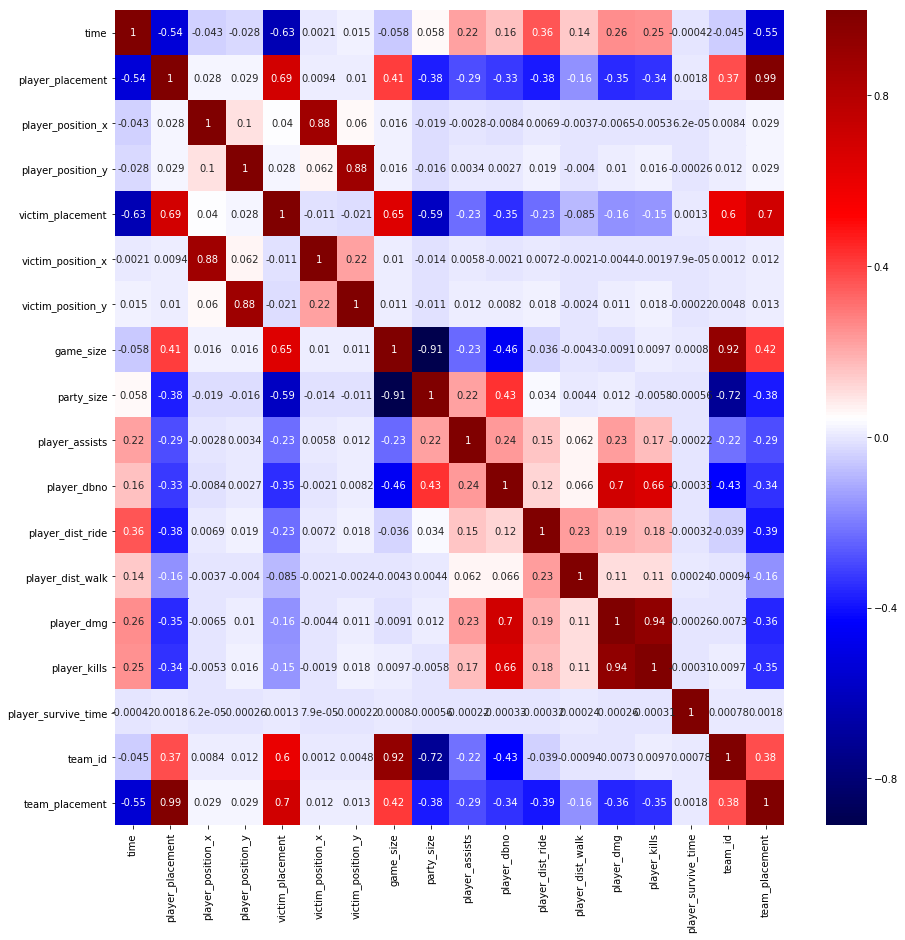

In [24]:
# correlations = ol_deathmatch.corr()
# fig, ax = plt.subplots(figsize = (15,15))
# sns.heatmap(correlations,cmap = 'seismic',annot = True, ax=ax)

In [29]:
# col_drops = ['team_placement','team_id','player_kills','player_dmg','party_size',]
# deathmatch = ol_deathmatch.drop(labels = col_drops,axis = 1)

In [31]:
# deathmatch.head()

,match_id,time,weapon,player_name,player_placement,player_position_x,player_position_y,map,victim_name,victim_placement,victim_position_x,victim_position_y,game_size,match_mode,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_survive_time
0,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,KrazyPortuguese,5.0,657725.10,146275.2,47.0,tpp,0.0,1.0,2423.28467,1438.100590,823.575
1,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,X3evolution,33.0,92238.68,723375.1,47.0,tpp,0.0,1.0,78.05448,366.673737,215.627
2,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,CtrlZee,46.0,367304.50,421216.1,47.0,tpp,0.0,1.0,0.00000,28.314629,117.053
3,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,BlackDpre,13.0,476645.90,316758.4,47.0,tpp,0.0,1.0,4287.49700,1924.983640,1244.531
4,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,Vjolt,13.0,473588.50,318418.8,47.0,tpp,0.0,0.0,3792.11523,2298.729490,1244.636


In [ ]:
# correlations = deathmatch.corr()
# fig, ax = plt.subplots(figsize = (20,20))
# sns.heatmap(correlations,cmap = 'seismic',annot = True, ax=ax)

In [33]:
# X_deathmatch = deathmatch[['time','weapon','player_position_x','player_position_y','map','victim_placement', 'victim_position_x','victim_position_y','game_size','player_assists','player_dbno','player_dist_ride','player_dist_walk','player_survive_time']]
# y_deathmatch = deathmatch[['player_placement']]

In [34]:
# y_deathmatch['top3'] = np.where(y_deathmatch['player_placement'] <= 3,True,False)

C:\Users\anima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
# y_deathmatch.drop('player_placement',axis=1,inplace=True)

C:\Users\anima\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
# X_deathmatch.head(2)

,time,weapon,player_position_x,player_position_y,map,victim_placement,victim_position_x,victim_position_y,game_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_survive_time
0,823,Grenade,657725.10,146275.2,MIRAMAR,5.0,657725.10,146275.2,47.0,0.0,1.0,2423.28467,1438.100590,823.575
1,194,SCAR-L,93091.37,722236.4,MIRAMAR,33.0,92238.68,723375.1,47.0,0.0,1.0,78.05448,366.673737,215.627


In [38]:
# X_deathmatch['game_size'][X_deathmatch['game_size'].isna()] = 27

C:\Users\anima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anima\Anaconda3\lib\site-packages\pandas\core\generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\anima\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exe

In [39]:
# X_deathmatch['player_assists'][X_deathmatch['player_assists'].isna()] = 0

C:\Users\anima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
# X_deathmatch['player_dbno'][X_deathmatch['player_dbno'].isna()] = 0

C:\Users\anima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
# X_deathmatch['player_dist_ride'][X_deathmatch['player_dist_ride'].isna()] = 1

C:\Users\anima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
# X_deathmatch['player_dist_walk'][X_deathmatch['player_dist_walk'].isna()] = 6126.2508315

C:\Users\anima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
# X_deathmatch['player_survive_time'][X_deathmatch['player_survive_time'].isna()] = 58195.84

C:\Users\anima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# X_deathmatch.describe()

In [44]:
# X_deathmatch.head(2)

,time,weapon,player_position_x,player_position_y,map,victim_placement,victim_position_x,victim_position_y,game_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_survive_time
0,823,Grenade,657725.10,146275.2,MIRAMAR,5.0,657725.10,146275.2,47.0,0.0,1.0,2423.28467,1438.100590,823.575
1,194,SCAR-L,93091.37,722236.4,MIRAMAR,33.0,92238.68,723375.1,47.0,0.0,1.0,78.05448,366.673737,215.627


In [ ]:
# X_deathmatch_weapons = pd.get_dummies(X_deathmatch['weapon'])
# X_deathmatch_map = pd.get_dummies(X_deathmatch['map'])
# X_deathmatch = pd.concat([X_deathmatch,X_deathmatch_weapons,X_deathmatch_map], axis = 1)
# X_deathmatch.head(2)

In [46]:
# X_deathmatch.drop(['weapon','map'],inplace= True,axis=1)
# X_deathmatch.head(2)

,time,player_position_x,player_position_y,victim_placement,victim_position_x,victim_position_y,game_size,player_assists,player_dbno,player_dist_ride,...,Vector,Win94,death.Buff_FireDOT_C,death.PG117_A_01_C,death.PlayerMale_A_C,death.ProjMolotov_C,death.ProjMolotov_DamageField_C,death.WeapSawnoff_C,ERANGEL,MIRAMAR
0,823,657725.10,146275.2,5.0,657725.10,146275.2,47.0,0.0,1.0,2423.28467,...,0,0,0,0,0,0,0,0,0,1
1,194,93091.37,722236.4,33.0,92238.68,723375.1,47.0,0.0,1.0,78.05448,...,0,0,0,0,0,0,0,0,0,1


In [57]:
# deathmatch = pd.concat([X_deathmatch,y_deathmatch],join="outer", axis=1)
# deathmatch.head()

,time,player_position_x,player_position_y,victim_placement,victim_position_x,victim_position_y,game_size,player_assists,player_dbno,player_dist_ride,...,Win94,death.Buff_FireDOT_C,death.PG117_A_01_C,death.PlayerMale_A_C,death.ProjMolotov_C,death.ProjMolotov_DamageField_C,death.WeapSawnoff_C,ERANGEL,MIRAMAR,top3
0,823,657725.10,146275.2,5.0,657725.10,146275.2,47.0,0.0,1.0,2423.28467,...,0,0,0,0,0,0,0,0,1,False
1,194,93091.37,722236.4,33.0,92238.68,723375.1,47.0,0.0,1.0,78.05448,...,0,0,0,0,0,0,0,0,1,False
2,103,366921.40,421623.9,46.0,367304.50,421216.1,47.0,0.0,1.0,0.00000,...,0,0,0,0,0,0,0,0,1,False
3,1018,472014.20,313274.8,13.0,476645.90,316758.4,47.0,0.0,1.0,4287.49700,...,0,0,0,0,0,0,0,0,1,False
4,1018,473357.80,318340.5,13.0,473588.50,318418.8,47.0,0.0,0.0,3792.11523,...,0,0,0,0,0,0,0,0,1,False


In [59]:
# deathmatch.to_pickle('deathmatch.pkl')

In [2]:
deathmatch = pd.read_pickle('deathmatch.pkl')

X_deathmatch = deathmatch.iloc[:,:-1]
y_deathmatch = deathmatch.iloc[:,-1]

In [ ]:
# 11 	player_survive_time 	0.4674220591
# 0 	time 	0.0917273374
# 10 	player_dist_walk 	0.0806325772
# 3 	victim_placement 	0.0775325860
# 9 	player_dist_ride 	0.0555181214
# 8 	player_dbno 	0.0329075658
# 1 	player_position_x 	0.0284733327
# 2 	player_position_y 	0.0283460899
# 7 	player_assists 	0.0280943620
# 5 	victim_position_y 	0.0276323969
# 4 	victim_position_x 	0.0271056794
# 6 	game_size 	0.0234174769

In [7]:
X_deathmatch.iloc[0]

time                                  823.0
player_position_x                  657725.1
player_position_y                  146275.2
victim_placement                        5.0
victim_position_x                  657725.1
                                     ...   
death.ProjMolotov_C                     0.0
death.ProjMolotov_DamageField_C         0.0
death.WeapSawnoff_C                     0.0
ERANGEL                                 0.0
MIRAMAR                                 1.0
Name: 0, Length: 70, dtype: float64

In [21]:
X_deathmatch.drop(['player_survive_time','time','player_dist_walk','victim_placement','game_size'],inplace=True,axis=1)

In [4]:
y_deathmatch.head()

0    False
1    False
2    False
3    False
4    False
Name: top3, dtype: bool

In [22]:
X_deathmatch.columns

Index(['player_position_x', 'player_position_y', 'victim_position_x',
       'victim_position_y', 'player_assists', 'player_dbno',
       'player_dist_ride', 'AKM', 'AUG', 'AWM', 'Aquarail', 'Bluezone', 'Boat',
       'Buggy', 'Crossbow', 'Crowbar', 'DP-28', 'Dacia', 'Down and Out',
       'Drown', 'Falling', 'Grenade', 'Groza', 'Hit by Car', 'Kar98k', 'M16A4',
       'M24', 'M249', 'M416', 'Machete', 'Micro UZI', 'Mini 14', 'Mk14',
       'Motorbike', 'Motorbike (SideCar)', 'P18C', 'P1911', 'P92', 'Pan',
       'Pickup Truck', 'Punch', 'R1895', 'R45', 'RedZone', 'S12K', 'S1897',
       'S686', 'SCAR-L', 'SKS', 'Sickle', 'Tommy Gun', 'UMP9', 'Uaz', 'VSS',
       'Van', 'Vector', 'Win94', 'death.Buff_FireDOT_C', 'death.PG117_A_01_C',
       'death.PlayerMale_A_C', 'death.ProjMolotov_C',
       'death.ProjMolotov_DamageField_C', 'death.WeapSawnoff_C', 'ERANGEL',
       'MIRAMAR'],
      dtype='object')

### Models to look at
1. Logistic Regression
2. Decision Trees
3. KNN Classifier
4. SVM Classifier
5. Naive Bayes
6. Random Forest
7. SGD Classifier

### Case for:
#### Logistic Regression:
Logistic regression is great for binary targets. Here, our target is if they're in a top 3 finish or not. It is also easy to interpret the model for logistic regression. We can look at the coefficients/ features and see how they affect the outcome.
Some problems for this case are that I have left in some fairly colinear features. I expect this to negatively affect the training of the model. We also have a lot of data. I think most regression models can be very taxing on fitting and training. Logistic regression calculates on log odds, so be careful.

#### Decision Trees:
The decision tree model will do fine with binary targets. It also does not care that our features may be colinear.
The drawbacks of decision trees are that they are very taxing, especially if you let the trees run deep. They are also apt to overfit the data.

#### KNN Classifier:
KNN will be able to classify our binary data fairly well. There are no assumptions necessary when commiting to KNN. If we wanted to throw this into a FLASK app, it would be easily implemented! Grid search will help find the optimal hyper parameters.  
KNN Is probably the slowest so far out of the options listed. Our dataset here is pretty imbalanced. If we wanted to go with KNN, we might need to undersample our observations. Be careful of categorical data.

#### SVM Classifier:
Support Vector Machines will yield very accurate results.
There's a lot of drawbacks with SVM here, because we have a huge dataset, and some features are very colinear.

#### Naive Bayes:
Naive Bayes is very efficient in its computation. We also have many more categorical data than numerical, so this will do better than not.
A problem here is that our data again has a bit of colinearity, and Naive Bayes will lose accuracy from that. For this project, having an accurate read of our features is fairly necessary, and Naive Bayes does a poor job of ensuring that. Coefficients need to be conditionally independent. Be careful of different forms of Bayes! (Bernouli, Gaussian, Multinomial)

#### Random Forest:
Random forest is efficient. It also makes for great feature estimations. This model also estimates test error fairly well.
A drawback is that the outcomes are hard to interpret (which we actually don't care as much.) There is also a drawback with computation time.

#### SGD Classifier:
SGD will be great for handling the large dataset we have here.
The con of using SGD is that it presupposes linear data and standardized data as well. I have done neither of those things to this dataset.

## In the end, we'll use:
1. Naive Bayes
2. Logistic Regression
3. Random Forest

## Metrics for determining the better Classifying model:

1. Accuracy
2. Precision
3. Recall
4. F1 Score
5. ROC
6. AUC

### Accuracy:
Accuracy is the total correct predictions over the total outcomes. This is good for when our dataset has a fairly balanced target. But the case here is that we have an imbalanced target. There are many more losers (non-top-3) players than not.

### Precision:
Precision in this case, is out of the total predicted to be top 3 finishers, how many are actually top 3 finishers? This metric punishes the score by the amount of false positives. This might be an okay metric, but we really want to make sure we capture all the true positive cases and not get penalized for doing so.

### Recall:
Recall in this case, is out of the total top 3 finishers, how many did we select? This metric punishes the model for not selecting a top 3 finisher.

### F1 Score:
The F1 Score is the harmonic mean between the Precision and Recall. For this scenario, I might consider doing an F2 score, where I actually consider both Precision and Recall, but place more emphasis on Recall.

### ROC:
ROC can be calculated as 1 minus the True Negative Rate (TNR). It is a commonly accepted metric for determining the True Positive Rate to False Positive Rate. Shows where the thresholds are for the curve.

### AUC:
AUC measures the area underneath an ROC curve. The greater the area, the better the model in general.

## I ended up...
Choosing a Recall metric. The reasoning here is that it will capture the most top 3 finishers. I am also under the impression that even if it incorrectly classifies somebody as top 3, they will most likely be a player near the top 3.

## Notes for later
Alright. We've chosen the models to run, and the metric to validate/ test them on. Let's do it!

In [3]:
#Let's run Naive Bayes
from sklearn.naive_bayes import GaussianNB as GNB, BernoulliNB as BNB
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_deathmatch,y_deathmatch,test_size=.2,shuffle=True)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=.25,shuffle=True)
X_small,X_small_val, y_small, y_small_val = train_test_split(X_train,y_train, train_size=.02,test_size = .02,shuffle=True)

In [ ]:
# ['time', 'player_position_x', 'player_position_y', 'victim_placement',
#        'victim_position_x', 'victim_position_y', 'game_size', 'player_assists',
#        'player_dbno', 'player_dist_ride', 'player_dist_walk',
#        'player_survive_time', 'AKM', 'AUG', 'AWM', 'Aquarail', 'Bluezone',
#        'Boat', 'Buggy', 'Crossbow', 'Crowbar', 'DP-28', 'Dacia',
#        'Down and Out', 'Drown', 'Falling', 'Grenade', 'Groza', 'Hit by Car',
#        'Kar98k', 'M16A4', 'M24', 'M249', 'M416', 'Machete', 'Micro UZI',
#        'Mini 14', 'Mk14', 'Motorbike', 'Motorbike (SideCar)', 'P18C', 'P1911',
#        'P92', 'Pan', 'Pickup Truck', 'Punch', 'R1895', 'R45', 'RedZone',
#        'S12K', 'S1897', 'S686', 'SCAR-L', 'SKS', 'Sickle', 'Tommy Gun', 'UMP9',
#        'Uaz', 'VSS', 'Van', 'Vector', 'Win94', 'death.Buff_FireDOT_C',
#        'death.PG117_A_01_C', 'death.PlayerMale_A_C', 'death.ProjMolotov_C',
#        'death.ProjMolotov_DamageField_C', 'death.WeapSawnoff_C', 'ERANGEL',
#        'MIRAMAR', 'top3']

In [5]:
X_gauss = X_small[['time','player_position_x','player_position_y','victim_placement','victim_position_x','victim_position_y',
                  'game_size','player_assists','player_dist_ride','player_dist_walk','player_survive_time',]]
X_bern = X_small[['player_dbno','AKM','AUG','AWM','Aquarail','Bluezone','Boat','Buggy','Crossbow','Crowbar','DP-28','Dacia',
                'Down and Out','Drown','Falling','Grenade','Groza','Hit by Car','Kar98k','M16A4','M24','M249','M416',
                'Machete','Micro UZI','Mini 14', 'Mk14','Motorbike','Motorbike (SideCar)','P18C','P1911','P92','Pan',
                'Pickup Truck', 'Punch', 'R1895','R45', 'RedZone','S12K','S1897','S686','SCAR-L','SKS','Sickle','Tommy Gun',
                'UMP9','Uaz','VSS','Van','Vector','Win94','death.Buff_FireDOT_C','death.PG117_A_01_C','death.PlayerMale_A_C',
                'death.ProjMolotov_C','death.ProjMolotov_DamageField_C', 'death.WeapSawnoff_C', 'ERANGEL','MIRAMAR']]
X_gauss_val = X_small_val[['time','player_position_x','player_position_y','victim_placement','victim_position_x','victim_position_y',
                  'game_size','player_assists','player_dist_ride','player_dist_walk','player_survive_time',]]
X_bern_val = X_small_val[['player_dbno','AKM','AUG','AWM','Aquarail','Bluezone','Boat','Buggy','Crossbow','Crowbar','DP-28','Dacia',
                'Down and Out','Drown','Falling','Grenade','Groza','Hit by Car','Kar98k','M16A4','M24','M249','M416',
                'Machete','Micro UZI','Mini 14', 'Mk14','Motorbike','Motorbike (SideCar)','P18C','P1911','P92','Pan',
                'Pickup Truck', 'Punch', 'R1895','R45', 'RedZone','S12K','S1897','S686','SCAR-L','SKS','Sickle','Tommy Gun',
                'UMP9','Uaz','VSS','Van','Vector','Win94','death.Buff_FireDOT_C','death.PG117_A_01_C','death.PlayerMale_A_C',
                'death.ProjMolotov_C','death.ProjMolotov_DamageField_C', 'death.WeapSawnoff_C', 'ERANGEL','MIRAMAR']]

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [32]:
gnb = GNB() #GaussianNaiveBayes
gnb.fit(X_gauss, y_small) #Gaussian features, with y-training set
bnb = BNB() #BernoulliNaiveBayes
bnb.fit(X_bern, y_small) #Bernoulli features, with y-training set

gnb_pred = gnb.predict_proba(X_gauss) 
bnb_pred = bnb.predict_proba(X_bern)
preds = pd.concat([X_gauss,X_bern],axis=1) #Appending the two predictions together?

gnb_stacked = GNB()
gnb_stacked.fit(preds,y_small) #Unsure if these would have the same/correct dimensions...

y_stack_pred = gnb_stacked.predict(X_small_val)

In [33]:
print(classification_report(y_small_val,y_stack_pred))

              precision    recall  f1-score   support

       False       1.00      0.00      0.00     54816
        True       0.38      1.00      0.56     34274

    accuracy                           0.38     89090
   macro avg       0.69      0.50      0.28     89090
weighted avg       0.76      0.38      0.21     89090



In [34]:
print(confusion_matrix(y_small_val,y_stack_pred,labels=[True,False]))

[[34274     0]
 [54810     6]]


In [6]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[    6 54810]
 [    0 34274]]


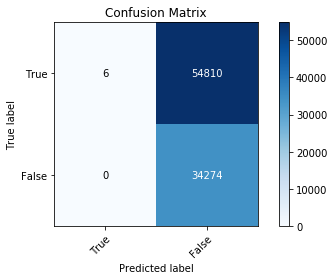

In [36]:
plot_confusion_matrix(y_small_val,y_stack_pred,classes=[True,False],title='Confusion Matrix')

# YIKES!
That's definitely not good. The model is predominately picking False by a huge amount. I fear this is happeninge because the False outcomes heavily outweigh the True ones. In order to combat this, let's try undersampling our False outcomes and refit the model on roughly half and half.

In [13]:
death_drops = y_deathmatch[~y_deathmatch]
indeces = death_drops.index

In [14]:
under_y_deathmatch = y_deathmatch.drop(index = indeces[:4596787].tolist())
under_X_deathmatch = X_deathmatch.drop(index = indeces[:4596787].tolist())

In [15]:
print(y_deathmatch.shape)
print(X_deathmatch.shape)

(12020952,)
(12020952, 70)


In [16]:
X_train,X_test,y_train,y_test = train_test_split(under_X_deathmatch,under_y_deathmatch,test_size=.2,shuffle=True)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=.25,shuffle=True)
X_small,X_small_val, y_small, y_small_val = train_test_split(X_train,y_train, train_size=.02,test_size = .02,shuffle=True)
X_gauss = X_small[['time','player_position_x','player_position_y','victim_placement','victim_position_x','victim_position_y',
                  'game_size','player_assists','player_dist_ride','player_dist_walk','player_survive_time',]]
X_bern = X_small[['player_dbno','AKM','AUG','AWM','Aquarail','Bluezone','Boat','Buggy','Crossbow','Crowbar','DP-28','Dacia',
                'Down and Out','Drown','Falling','Grenade','Groza','Hit by Car','Kar98k','M16A4','M24','M249','M416',
                'Machete','Micro UZI','Mini 14', 'Mk14','Motorbike','Motorbike (SideCar)','P18C','P1911','P92','Pan',
                'Pickup Truck', 'Punch', 'R1895','R45', 'RedZone','S12K','S1897','S686','SCAR-L','SKS','Sickle','Tommy Gun',
                'UMP9','Uaz','VSS','Van','Vector','Win94','death.Buff_FireDOT_C','death.PG117_A_01_C','death.PlayerMale_A_C',
                'death.ProjMolotov_C','death.ProjMolotov_DamageField_C', 'death.WeapSawnoff_C', 'ERANGEL','MIRAMAR']]
X_gauss_val = X_small_val[['time','player_position_x','player_position_y','victim_placement','victim_position_x','victim_position_y',
                  'game_size','player_assists','player_dist_ride','player_dist_walk','player_survive_time',]]
X_bern_val = X_small_val[['player_dbno','AKM','AUG','AWM','Aquarail','Bluezone','Boat','Buggy','Crossbow','Crowbar','DP-28','Dacia',
                'Down and Out','Drown','Falling','Grenade','Groza','Hit by Car','Kar98k','M16A4','M24','M249','M416',
                'Machete','Micro UZI','Mini 14', 'Mk14','Motorbike','Motorbike (SideCar)','P18C','P1911','P92','Pan',
                'Pickup Truck', 'Punch', 'R1895','R45', 'RedZone','S12K','S1897','S686','SCAR-L','SKS','Sickle','Tommy Gun',
                'UMP9','Uaz','VSS','Van','Vector','Win94','death.Buff_FireDOT_C','death.PG117_A_01_C','death.PlayerMale_A_C',
                'death.ProjMolotov_C','death.ProjMolotov_DamageField_C', 'death.WeapSawnoff_C', 'ERANGEL','MIRAMAR']]


In [17]:
gnb = GNB() #GaussianNaiveBayes
gnb.fit(X_gauss, y_small) #Gaussian features, with y-training set
bnb = BNB() #BernoulliNaiveBayes
bnb.fit(X_bern, y_small) #Bernoulli features, with y-training set

gnb_pred = gnb.predict(X_gauss) 
bnb_pred = bnb.predict(X_bern)
preds = pd.concat([X_gauss,X_bern],axis=1) #Appending the two predictions together?

gnb_stacked = GNB()
gnb_stacked.fit(preds,y_small) #Unsure if these would have the same/correct dimensions...

y_stack_pred = gnb_stacked.predict(X_small_val)
print(classification_report(y_small_val,y_stack_pred))

              precision    recall  f1-score   support

       False       1.00      0.00      0.00     54816
        True       0.38      1.00      0.56     34274

    accuracy                           0.38     89090
   macro avg       0.69      0.50      0.28     89090
weighted avg       0.76      0.38      0.21     89090



Confusion matrix, without normalization
[[    6 54810]
 [    0 34274]]


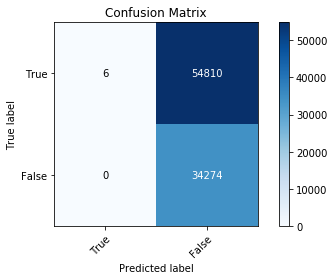

In [18]:
plot_confusion_matrix(y_small_val,y_stack_pred,classes=[True,False],title='Confusion Matrix')

## Put a hold on this...
Let's try going to logistic regression and see if we can get better results.

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=-1,solver='saga')

logreg.fit(X_train,y_train)
y_val_pred = logreg.predict(X_validate)
print(classification_report(y_validate,y_val_pred))

C:\Users\anima\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

       False       0.78      0.95      0.86   1839188
        True       0.41      0.10      0.16    565003

    accuracy                           0.75   2404191
   macro avg       0.59      0.53      0.51   2404191
weighted avg       0.69      0.75      0.69   2404191



Confusion matrix, without normalization
[[1756200   82988]
 [ 507689   57314]]


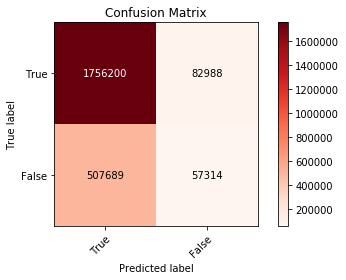

In [25]:
plot_confusion_matrix(y_validate,y_val_pred,classes=[True,False],title='Confusion Matrix')

Alrighty. This is looking promising. Let's move on to the last model. Random Forest.

In [9]:
from sklearn.ensemble import RandomForestClassifier as rfc


In [26]:
rfclassifier = rfc(n_estimators = 25, min_samples_split = 5, n_jobs=-1,)

rfclassifier.fit(X_train,y_train)
y_val_preds = rfclassifier.predict(X_validate)
print(classification_report(y_validate,y_val_preds))

              precision    recall  f1-score   support

       False       0.85      0.93      0.89   1839188
        True       0.66      0.44      0.53    565003

    accuracy                           0.82   2404191
   macro avg       0.75      0.69      0.71   2404191
weighted avg       0.80      0.82      0.80   2404191



Confusion matrix, without normalization
[[1712424  126764]
 [ 313766  251237]]


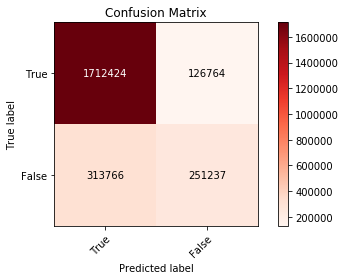

In [27]:
plot_confusion_matrix(y_validate,y_val_preds,classes=[True,False],title='Confusion Matrix')

## Well...
Out of all the models we've looked at, RandomForest blows NaiveBayes out of the water, and outperforms Logistic Regression by quite a bit. I would say to do gridsearch to increase recall rate, but I'm fine with .94 recall. Let's run this on test and call it a day.

In [28]:
y_test_preds = rfclassifier.predict(X_test)

In [29]:
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

       False       0.84      0.93      0.89   1839007
        True       0.66      0.44      0.53    565184

    accuracy                           0.82   2404191
   macro avg       0.75      0.69      0.71   2404191
weighted avg       0.80      0.82      0.80   2404191



Confusion matrix, without normalization
[[1780502   58055]
 [  92588  473046]]


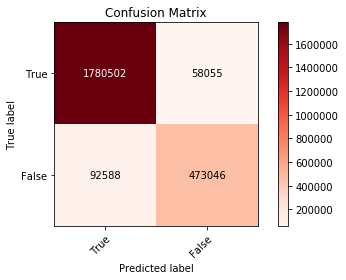

In [14]:
plot_confusion_matrix(y_test,y_test_preds,classes=[True,False],title='Confusion Matrix')

In [30]:
coefficients = rfclassifier.feature_importances_.tolist()

In [31]:
features = X_train.columns

In [32]:
feat_coeffs = list(zip(features,coefficients))

In [35]:
print(feat_coeffs)

[('time', 0.091727337369391), ('player_position_x', 0.02847333273168295), ('player_position_y', 0.028346089874450673), ('victim_placement', 0.07753258598356562), ('victim_position_x', 0.02710567936162608), ('victim_position_y', 0.02763239691613912), ('game_size', 0.02341747691952538), ('player_assists', 0.028094361997978577), ('player_dbno', 0.03290756582313643), ('player_dist_ride', 0.05551812139918365), ('player_dist_walk', 0.08063257723317045), ('player_survive_time', 0.4674220590755263), ('AKM', 0.001784777400891832), ('AUG', 0.00012535486888771652), ('AWM', 0.0003121982138538364), ('Aquarail', 7.951493696769319e-08), ('Bluezone', 0.0005062356363495202), ('Boat', 2.8914463823200707e-05), ('Buggy', 6.083205640086617e-05), ('Crossbow', 0.00014009954516020867), ('Crowbar', 3.2054959436889753e-05), ('DP-28', 0.0002238498827447149), ('Dacia', 0.00018021090967929382), ('Down and Out', 0.002504614412446101), ('Drown', 8.14510989185451e-05), ('Falling', 0.0003478072076593429), ('Grenade', 

In [33]:
feat_coeffs

In [33]:
fc = pd.DataFrame(feat_coeffs, columns = ['Feature','Coefficient'])

In [34]:
pd.set_option("display.precision",10)
fc

,Feature,Coefficient
0,player_position_x,0.1455405431
1,player_position_y,0.1473195683
2,victim_position_x,0.1425112575
3,victim_position_y,0.1453579940
4,player_assists,0.0782106727
5,player_dbno,0.0832089815
6,player_dist_ride,0.1848560785
7,AKM,0.0032617075
8,AUG,0.0006111158
9,AWM,0.0017204643


In [35]:
fc.sort_values('Coefficient',ascending=False)

,Feature,Coefficient
6,player_dist_ride,0.1848560785
1,player_position_y,0.1473195683
0,player_position_x,0.1455405431
3,victim_position_y,0.1453579940
2,victim_position_x,0.1425112575
5,player_dbno,0.0832089815
4,player_assists,0.0782106727
28,M416,0.0048509543
18,Down and Out,0.0047475710
24,Kar98k,0.0042574896


# The results are in:

## Weapons don't impact the game as much:
That is to say, weapons seem fairly balanced. Even the highest coefficient weapon, the M416, can only attribute .2% What this also demonstrates is that the key to higher placement is just player survival time. Not even getting kills inherently guarantees you more success. Positioning of the player is also much more important than the weapons which you currently have.